<a href="https://colab.research.google.com/github/shivanshu-sahoo/Cyborg_git_task/blob/master/Internship_studio_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel("/content/drive/My Drive/ML/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
print("Number of Examples" ,df.shape[0])

Number of Examples 5000


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.columns = [feature.replace(' ', '_') for feature in df.columns]

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.Experience[(df.Experience)<0]=df['Experience'].median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cols = ['Experience','Income','CCAvg','Mortgage']
for feature in cols:
  percentile_1 = np.percentile(df[feature],[1])[0]
  if not df[(df[feature]<0.3*percentile_1)].empty:
    df[feature][(df[feature]<0.3*percentile_1)]=0.3*percentile_1
  percentile_99 = np.percentile(df[feature],[99])[0]
  if not df[(df[feature]>3*percentile_99)].empty:
    df[feature][(df[feature]>3*percentile_99)]=3*percentile_99
  

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df['Mortgage'].isin([0]).sum()

3462

In [ ]:
df['CCAvg'].isin([0]).sum()

106

In [ ]:
cat_cols=['Family','Education','Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
for feature in cat_cols:
  print('the Value Count of',feature,':\n',df[feature].value_counts())

the Value Count of Family :
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
the Value Count of Education :
 1    2096
3    1501
2    1403
Name: Education, dtype: int64
the Value Count of Personal_Loan :
 0    4520
1     480
Name: Personal_Loan, dtype: int64
the Value Count of Securities_Account :
 0    4478
1     522
Name: Securities_Account, dtype: int64
the Value Count of CD_Account :
 0    4698
1     302
Name: CD_Account, dtype: int64
the Value Count of Online :
 1    2984
0    2016
Name: Online, dtype: int64
the Value Count of CreditCard :
 0    3530
1    1470
Name: CreditCard, dtype: int64


In [ ]:
del df['ID']
del df['ZIP_Code']

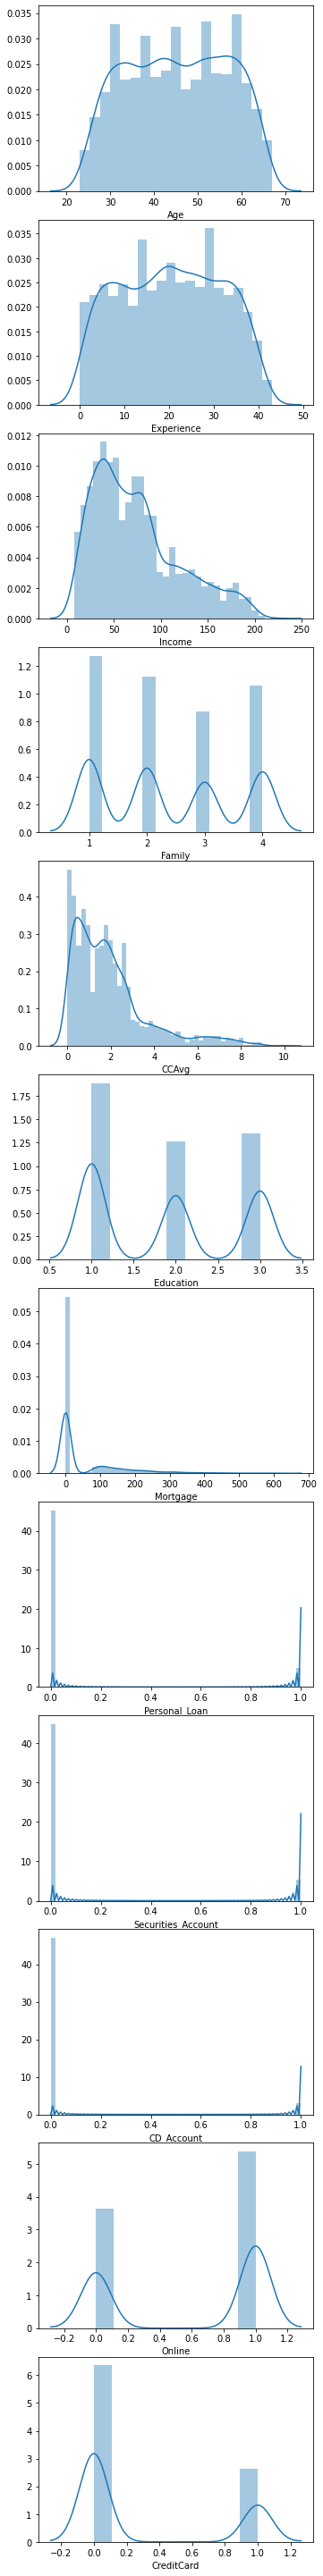

In [ ]:
columns = df.columns
no_of_feature = len(columns)
fig,ax= plt.subplots(no_of_feature,1,figsize=(5, 40))
fig.tight_layout()
i=0
for feature in columns:
  sns.distplot(df[feature],hist=True,ax=ax[i])
  i=i+1

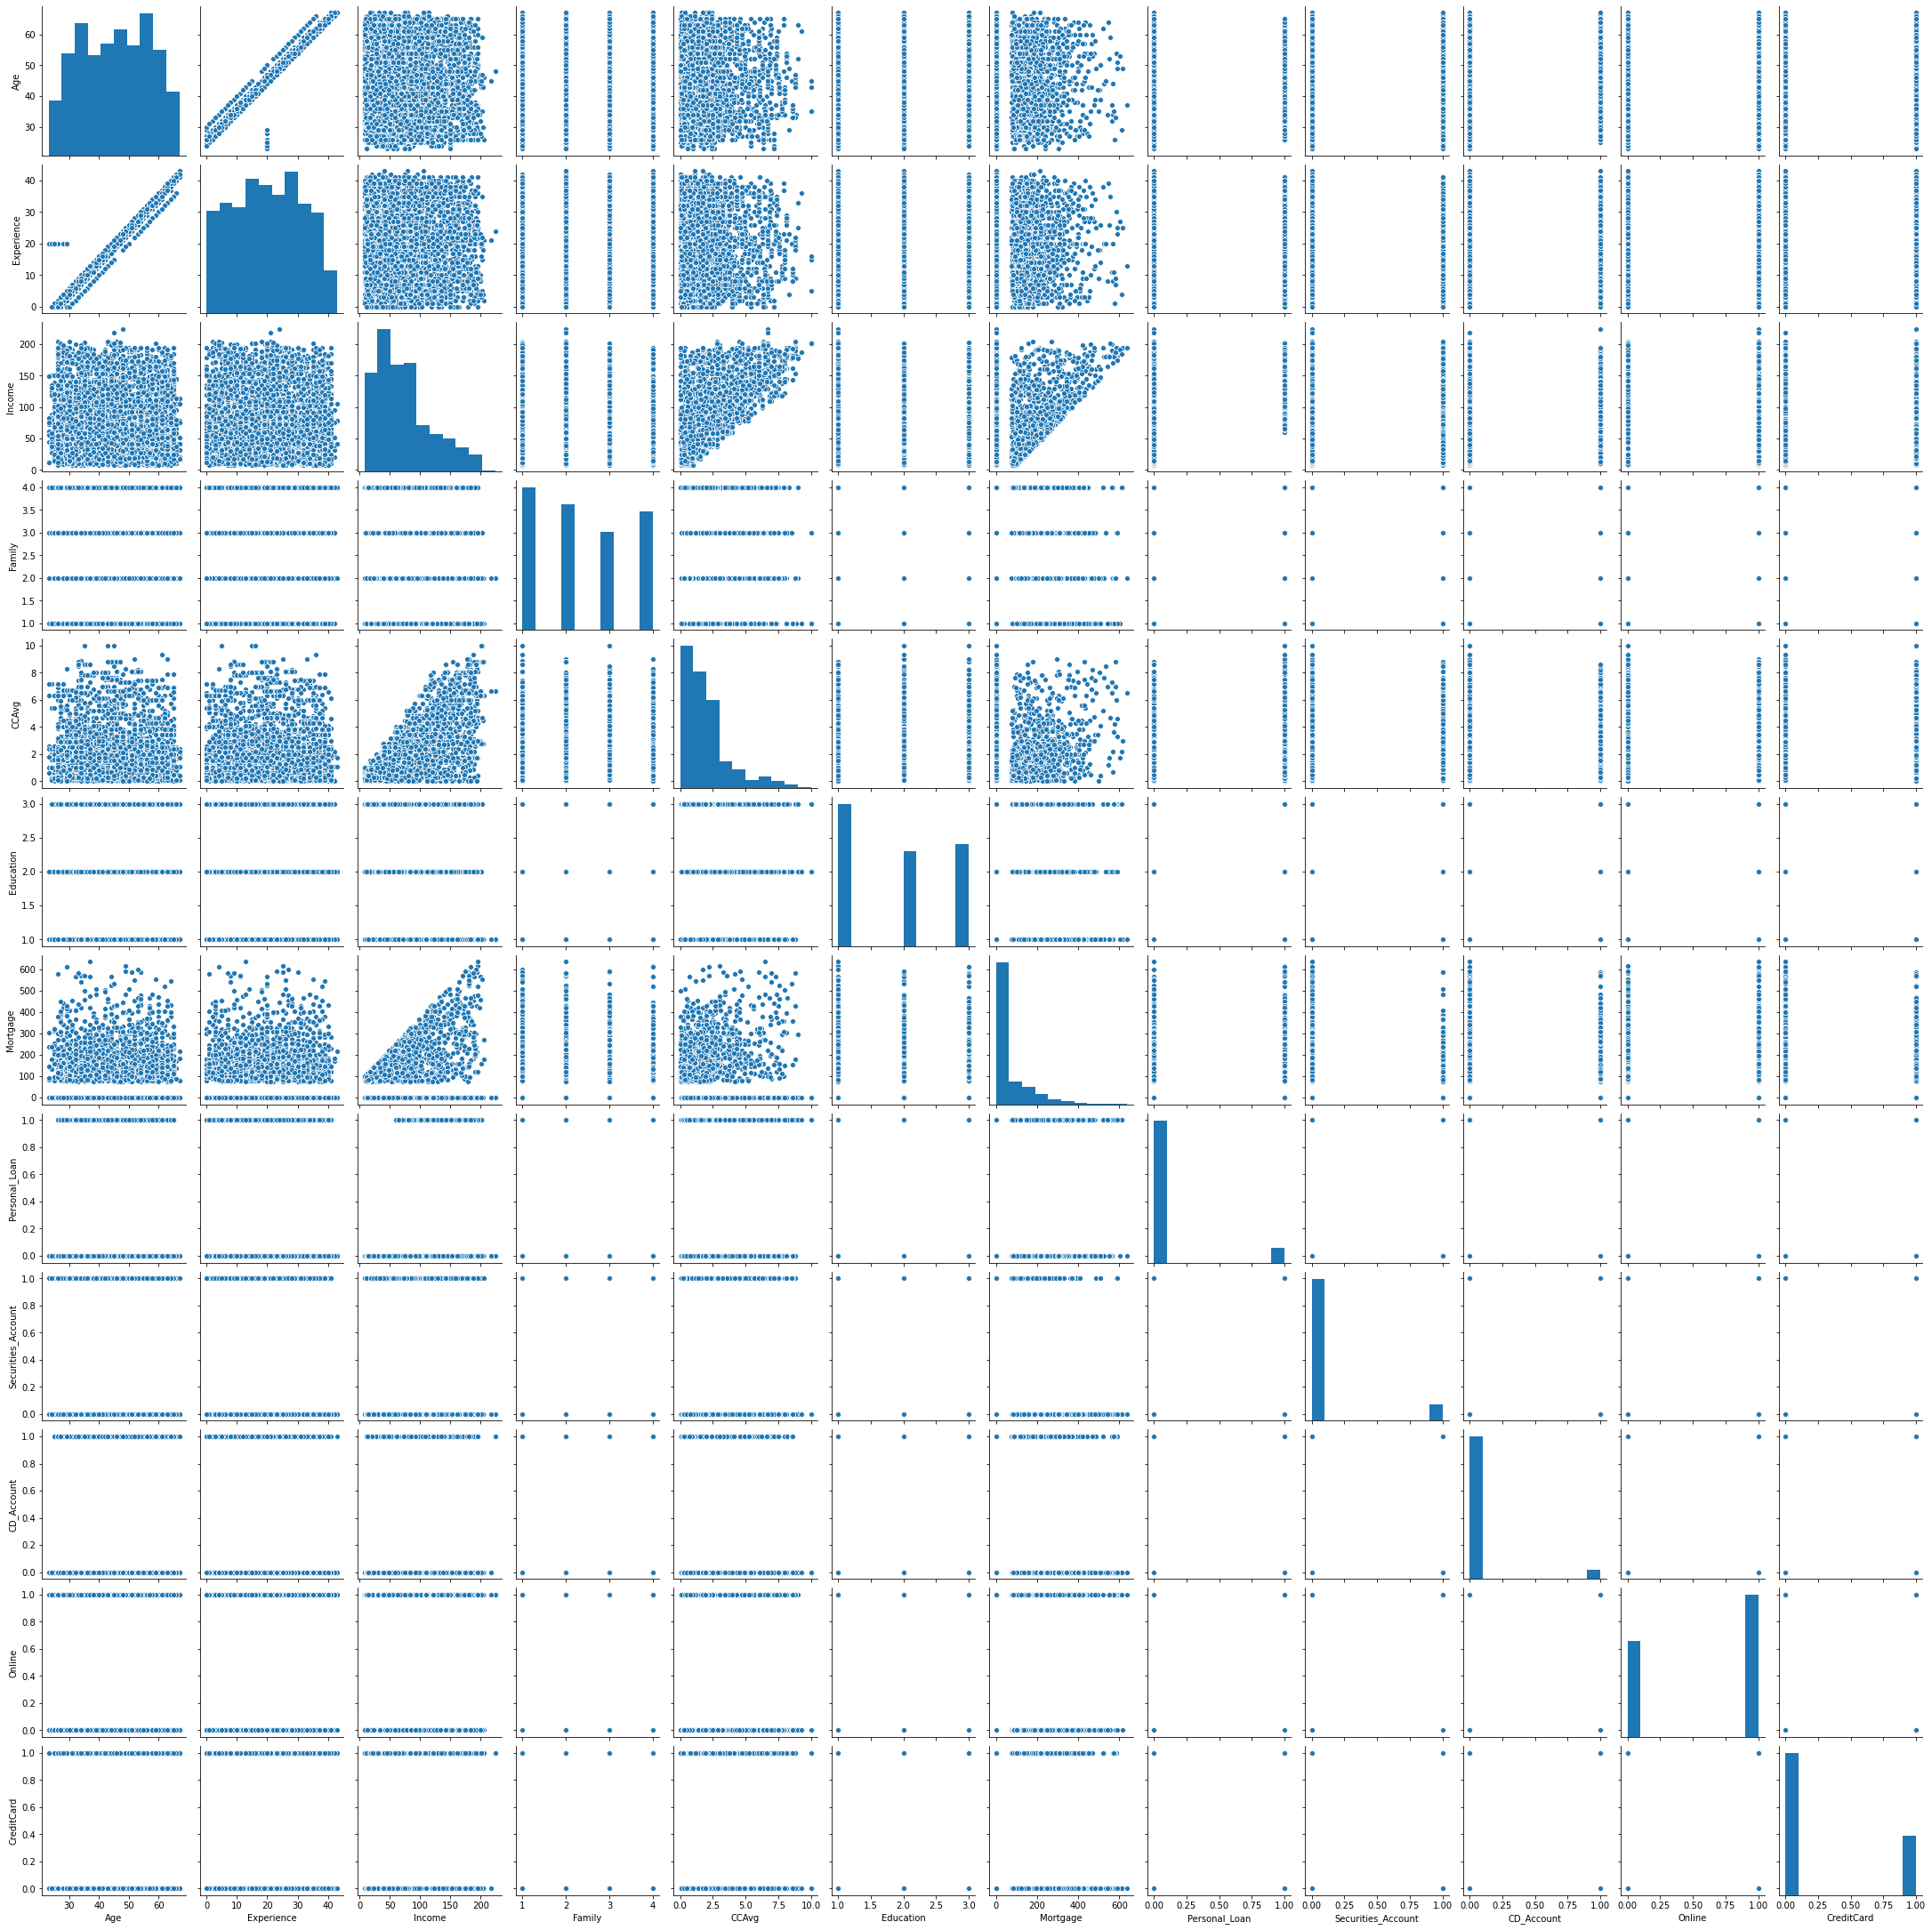

In [ ]:
sns.pairplot(df)

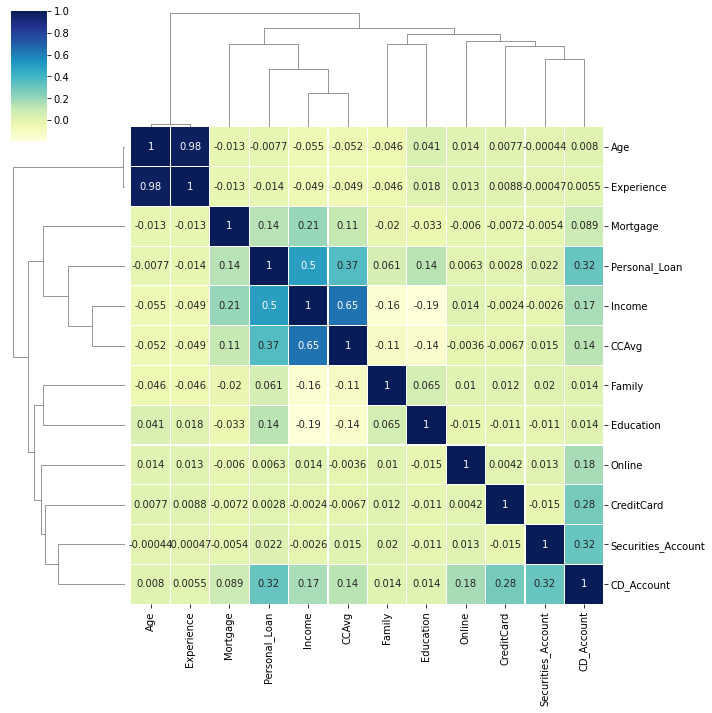

In [78]:
corr=df.corr()
cg = sns.clustermap(corr, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

In [79]:
X = df.drop(['Personal_Loan'],axis=1)
y = df['Personal_Loan']

In [83]:
pt= PowerTransformer()
X=pt.fit_transform(X)

In [85]:
scaler = StandardScaler()
X= scaler.fit_transform(X)